# 🌇 Análisis de la Contaminación por PM2.5 en Nueva York (2020–2024)

> _Una exploración visual y técnica del aire que respiramos._

Este proyecto examina cómo la concentración de **material particulado fino (PM2.5)** ha evolucionado en la ciudad de Nueva York durante cinco años. A través de visualizaciones claras y análisis estadísticos, se revela:

- La variabilidad mensual del PM2.5 y sus días extremos.
- El comportamiento estacional y la presencia de outliers en cada mes.
- La relación directa entre los valores de **PM2.5** y el **Índice de Calidad del Aire (AQI)** —mostrando cómo los datos técnicos se traducen en riesgos reales para la salud.

🧠 Visualizaciones clave:
- **Boxplots mensuales** que muestran la dispersión y anomalías del PM2.5.
- **Scatterplots y líneas temporales** que conectan la evolución del aire con el índice sanitario AQI.
- **Comparativas por año** para identificar patrones y eventos excepcionales (como el pico en 2023).

📌 Este análisis está diseñado no sólo para comprender los datos, sino para **contar una historia ambiental** basada en evidencia. Desde el rigor técnico hasta la visualización accesible —la ciencia se transforma en narrativa urbana.

---

🧪 *Autor del análisis:* César Díaz 
📍 *Ubicación de estudio:* Ciudad de Nueva York  
📅 *Período:* 2020–2024  
📘 *Tecnologías:* Python · Pandas · Seaborn · Matplotlib

---



In [1]:
import sys
print(sys.executable)

C:\Users\mjcd1\anaconda3\envs\unicornenv\python.exe


In [2]:
from sqlalchemy import create_engine
from getpass import getpass
import pandas as pd

# Solicitar credenciales de forma segura
usuario = input("Introduce tu usuario de MySQL: ")
contraseña = getpass("Introduce tu contraseña de MySQL: ")
host = input("Introduce el host (por defecto 'localhost'): ") or "localhost"
bd = input("Introduce el nombre de la base de datos (por defecto 'air_quality'): ") or "air_quality"

# Crear motor de conexión con SQLAlchemy
engine = create_engine(f"mysql+mysqlconnector://{usuario}:{contraseña}@{host}/{bd}")

# Probar la conexión
consulta = "SELECT * FROM dim_date"
df_dim_date = pd.read_sql(consulta, con=engine)
# Si tu tabla tiene columna de fecha, descomenta y ajusta:
# df_air_quality["date"] = pd.to_datetime(df_air_quality["date"], errors="coerce")

# Mostrar resultados
print("Primeros registros de la tabla dim_date:")
display(df_dim_date.head())



Introduce tu usuario de MySQL:  root
Introduce tu contraseña de MySQL:  ········
Introduce el host (por defecto 'localhost'):  localhost
Introduce el nombre de la base de datos (por defecto 'air_quality'):  air_quality


Primeros registros de la tabla dim_date:


,date_key,year,month,day,weekday
0,2020-01-01,2020,1,1,Wednesday
1,2020-01-02,2020,1,2,Thursday
2,2020-01-03,2020,1,3,Friday
3,2020-01-04,2020,1,4,Saturday
4,2020-01-05,2020,1,5,Sunday


In [4]:
df_dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date_key  1827 non-null   object
 1   year      1827 non-null   int64 
 2   month     1827 non-null   int64 
 3   day       1827 non-null   int64 
 4   weekday   1827 non-null   object
dtypes: int64(3), object(2)
memory usage: 71.5+ KB


In [5]:
# Recuperar lista de tablas
tables = pd.read_sql("SHOW TABLES", con=engine)
print(tables)


  Tables_in_air_quality
0              dim_date
1            dim_method
2              dim_site
3            dim_source
4             fact_pm25


In [6]:
# Lista de tablas a cargar (excluimos dim_date que ya tienes)
table_names = ["dim_method", "dim_site", "dim_source", "fact_pm25"]

# Carga en el namespace actual
for tbl in table_names:
    df_name = f"df_{tbl}"
    globals()[df_name] = pd.read_sql(f"SELECT * FROM {tbl}", con=engine)
    print(f"{df_name} cargado: {globals()[df_name].shape} filas x columnas")

# Verificación rápida
for tbl in table_names:
    df = globals()[f"df_{tbl}"]
    print(f"\n--- {tbl} head ---")
    display(df.head(3))
    print(df.info())


df_dim_method cargado: (7, 5) filas x columnas
df_dim_site cargado: (35, 6) filas x columnas
df_dim_source cargado: (5, 3) filas x columnas
df_fact_pm25 cargado: (60020, 7) filas x columnas

--- dim_method head ---


,method_id,method_code,method_name,sample_duration,units_of_measure
0,1,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,None,ug/m3 LC
1,2,236,Teledyne T640 at 5.0 LPM,None,ug/m3 LC
2,3,736,Teledyne T640 at 5.0 LPM (Corrected),None,ug/m3 LC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   method_id         7 non-null      int64 
 1   method_code       7 non-null      object
 2   method_name       7 non-null      object
 3   sample_duration   0 non-null      object
 4   units_of_measure  7 non-null      object
dtypes: int64(1), object(4)
memory usage: 412.0+ bytes
None

--- dim_site head ---


,site_id,site_name,county,state,latitude,longitude
0,360010005,ALBANY COUNTY HEALTH DEPT,Albany,New York,42.64225,-73.75464
1,360010012,LOUDONVILLE,Albany,New York,42.68075,-73.75733
2,360050080,MORRISANIA,Bronx,New York,40.83606,-73.92009


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   site_id    35 non-null     int64  
 1   site_name  35 non-null     object 
 2   county     35 non-null     object 
 3   state      35 non-null     object 
 4   latitude   35 non-null     float64
 5   longitude  35 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ KB
None

--- dim_source head ---


,source_id,year,table_name
0,1,2020,raw_all_years
1,2,2021,raw_all_years
2,3,2022,raw_all_years


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   source_id   5 non-null      int64 
 1   year        5 non-null      int64 
 2   table_name  5 non-null      object
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes
None

--- fact_pm25 head ---


,fact_id,date_key,site_id,method_id,source_id,pm25_value,aqi_value
0,1,2024-01-01,360010005,1,5,4.8,27
1,2,2024-01-04,360010005,1,5,5.6,31
2,3,2024-01-07,360010005,1,5,4.0,22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60020 entries, 0 to 60019
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fact_id     60020 non-null  int64  
 1   date_key    60020 non-null  object 
 2   site_id     60020 non-null  int64  
 3   method_id   60020 non-null  int64  
 4   source_id   60020 non-null  int64  
 5   pm25_value  60020 non-null  float64
 6   aqi_value   60020 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 3.2+ MB
None


## **📌 Evolución anual de PM2.5 (2020–2024)**

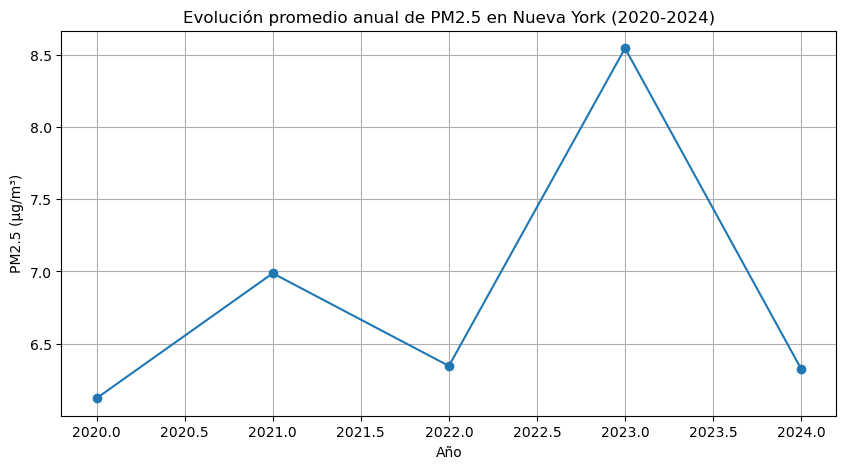

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Unir fact_pm25 con dim_date para obtener fechas y valores
df_fact = df_fact_pm25.merge(df_dim_date, on='date_key', how='left')

# 2. Calcular media anual de PM2.5
pm25_yearly = (
    df_fact
    .groupby('year')['pm25_value']
    .mean()
    .reset_index()
)

# 3. Graficar
plt.figure(figsize=(10, 5))
plt.plot(pm25_yearly['year'], pm25_yearly['pm25_value'], marker='o', linestyle='-')
plt.title('Evolución promedio anual de PM2.5 en Nueva York (2020-2024)')
plt.xlabel('Año')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)

# 4. Guardar la figura
plt.savefig('images_air_quality/evolucion_anual_pm25.png', dpi=300)

# 5. Mostrar
plt.show()


In [11]:
print(df_fact_pm25.columns.tolist())


['fact_id', 'date_key', 'site_id', 'method_id', 'source_id', 'pm25_value', 'aqi_value']


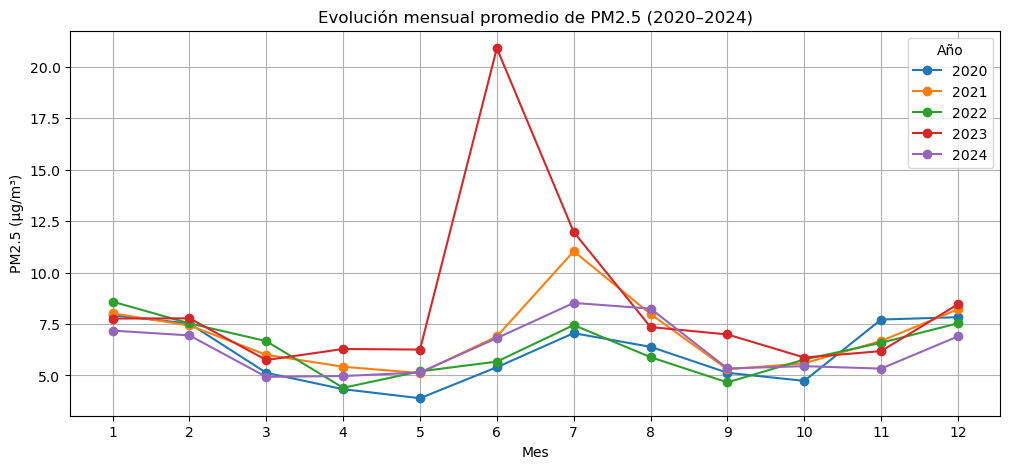

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Hacer merge solo con date_key, year y month  
df_pm25 = df_fact_pm25.merge(
    df_dim_date[['date_key', 'year', 'month']],
    on='date_key',
    how='left'
)

# 2. Agregar por año y mes
monthly = (
    df_pm25
    .groupby(['year', 'month'])['pm25_value']
    .mean()
    .reset_index()
    .sort_values(['year', 'month'])
)

# 3. Graficar evolución mensual
plt.figure(figsize=(12, 5))
for yr in monthly['year'].unique():
    sub = monthly[monthly['year'] == yr]
    plt.plot(sub['month'], sub['pm25_value'], marker='o', label=yr)

plt.title('Evolución mensual promedio de PM2.5 (2020–2024)')
plt.xlabel('Mes')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(1, 13))
plt.legend(title='Año')
plt.grid(True)

# 4. Guardar la figura
plt.savefig('images_air_quality/evolucion_mensual_pm25.png', dpi=300)
plt.show()


In [16]:
print(df_dim_date.columns.tolist())


['date_key', 'year', 'month', 'day', 'weekday']


In [17]:
# Reconstruir fecha desde year, month, day
df_pm25 = df_fact_pm25.merge(
    df_dim_date[['date_key', 'year', 'month', 'day']],
    on='date_key',
    how='left'
)

# Crear columna datetime
df_pm25['fecha'] = pd.to_datetime({
    'year':  df_pm25['year'],
    'month': df_pm25['month'],
    'day':   df_pm25['day']
})


In [19]:
df_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60020 entries, 0 to 60019
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fact_id     60020 non-null  int64         
 1   date_key    60020 non-null  object        
 2   site_id     60020 non-null  int64         
 3   method_id   60020 non-null  int64         
 4   source_id   60020 non-null  int64         
 5   pm25_value  60020 non-null  float64       
 6   aqi_value   60020 non-null  int64         
 7   year        60020 non-null  int64         
 8   month       60020 non-null  int64         
 9   day         60020 non-null  int64         
 10  fecha       60020 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 5.0+ MB


In [20]:
# Merge y creación de fecha en una sola celda
df_pm25 = df_fact_pm25.merge(
    df_dim_date[['date_key', 'year', 'month', 'day']],
    on='date_key',
    how='left'
)

df_pm25['fecha'] = pd.to_datetime({
    'year':  df_pm25['year'],
    'month': df_pm25['month'],
    'day':   df_pm25['day']
})


In [22]:
assert 'fecha' in df_pm25.columns, "La columna 'fecha' no fue creada correctamente"


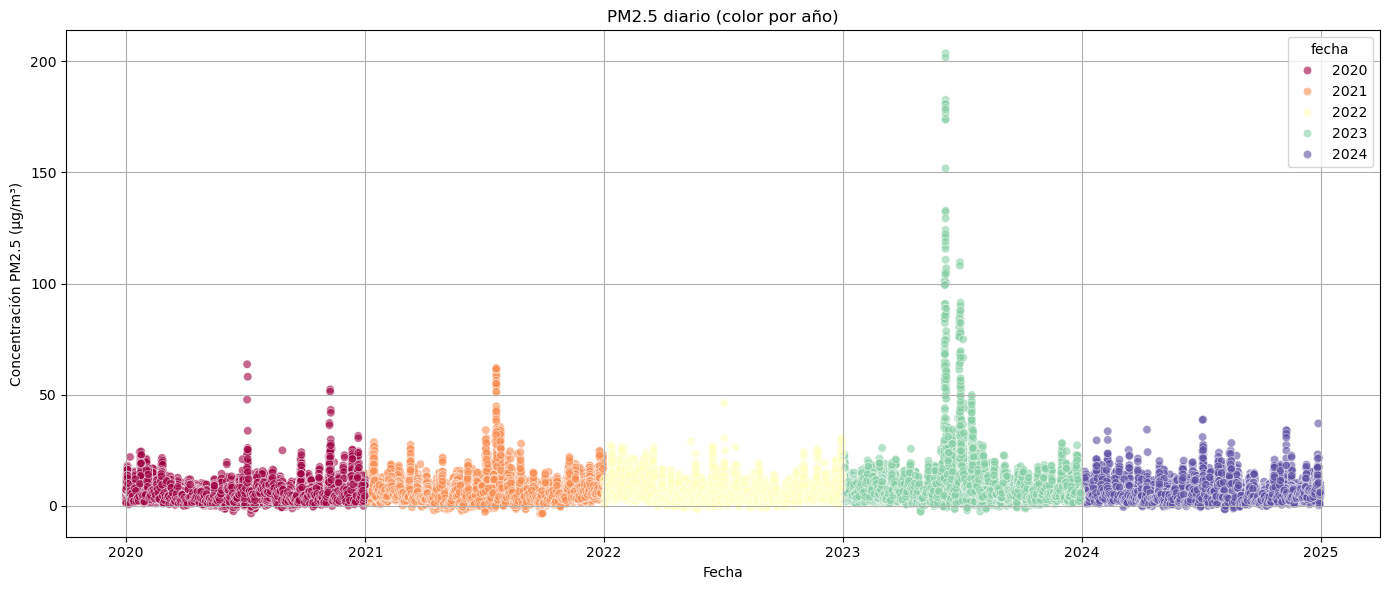

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función que crea la columna 'fecha' si no existe
def crear_fecha(df):
    if 'fecha' not in df.columns:
        df['fecha'] = pd.to_datetime({
            'year':  df['year'],
            'month': df['month'],
            'day':   df['day']
        })
    return df

# 1. Asegurar que df_dim_date tenga la fecha construida
df_dim_date = crear_fecha(df_dim_date)

# 2. Merge con df_fact_pm25
df_pm25 = df_fact_pm25.merge(
    df_dim_date[['date_key', 'fecha']],
    on='date_key',
    how='left'
)

# 3. Visualización: scatter PM2.5 diario por año
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=df_pm25,
    x='fecha',
    y='pm25_value',
    hue=df_pm25['fecha'].dt.year,  # Usamos el año directamente desde 'fecha'
    palette='Spectral',
    alpha=0.6
)

plt.title('PM2.5 diario (color por año)')
plt.xlabel('Fecha')
plt.ylabel('Concentración PM2.5 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.savefig('images_air_quality/scatter_pm25_years.png', dpi=300)
plt.show()


## **🧪 Distribución mensual de PM2.5 (Boxplot 2020–2024)**

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pm25_vs_aqi(df, fecha_col='fecha', pm25_col='pm25_value',
                     aqi_col='aqi_value', save_path=None, show=True):
    """
    Scatter plot de PM2.5 vs AQI coloreado por año.

    Parámetros:
        df         : DataFrame con columnas de fecha, PM2.5 y AQI.
        fecha_col  : Nombre de la columna fecha (tipo datetime).
        pm25_col   : Nombre columna PM2.5.
        aqi_col    : Nombre columna AQI.
        save_path  : Ruta para guardar imagen. None si no se quiere guardar.
        show       : Mostrar gráfico con plt.show(). Default True.
    """
    df_plot = df.copy()
    df_plot['Year'] = df_plot[fecha_col].dt.year

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_plot,
                    x=pm25_col,
                    y=aqi_col,
                    hue='Year',
                    palette='Spectral',
                    alpha=0.6)

    plt.title('Relación entre PM2.5 y AQI con color por año (2020–2024)', fontsize=14)
    plt.xlabel('Concentración PM2.5 (µg/m³)')
    plt.ylabel('Índice AQI')
    plt.grid(True)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)
    if show:
        plt.show()


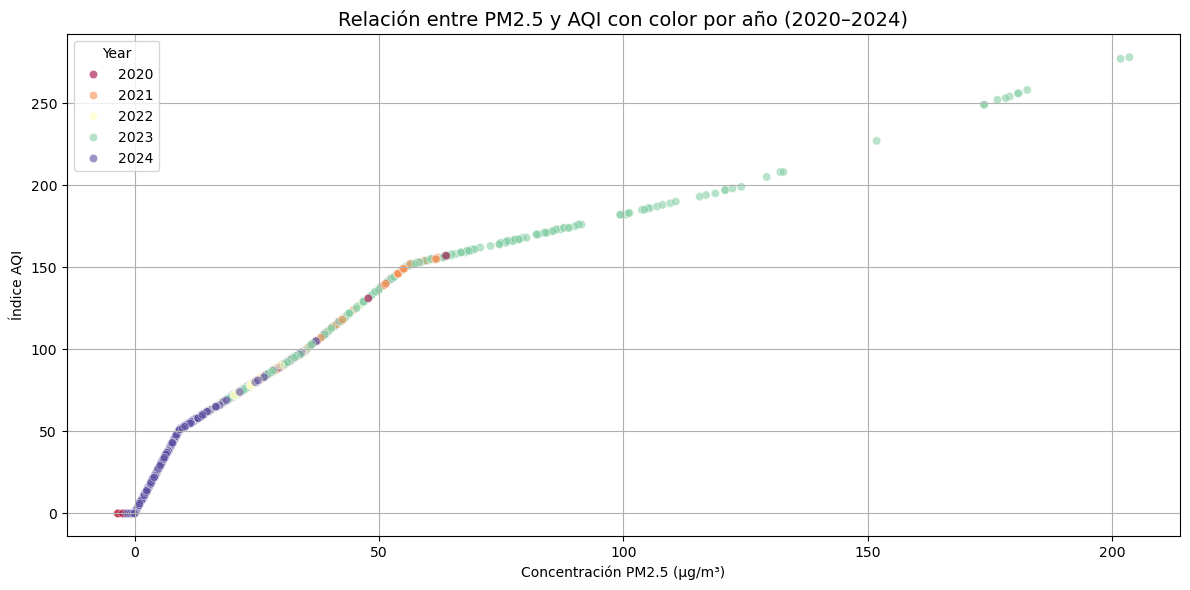

In [30]:
plot_pm25_vs_aqi(df_pm25, save_path='images_air_quality/scatter_pm25_vs_aqi.png')



In [33]:
print("Columnas en df_pm25:", df_pm25.columns.tolist())

Columnas en df_pm25: ['fact_id', 'date_key', 'site_id', 'method_id', 'source_id', 'pm25_value', 'aqi_value', 'fecha', 'Mes']


## **💡 ¿Cómo saber cuántos son realmente outliers?**
- Podemos calcularlos mes por mes así:

Columnas en df_pm25: ['fact_id', 'date_key', 'site_id', 'method_id', 'source_id', 'pm25_value', 'aqi_value', 'fecha', 'Mes']


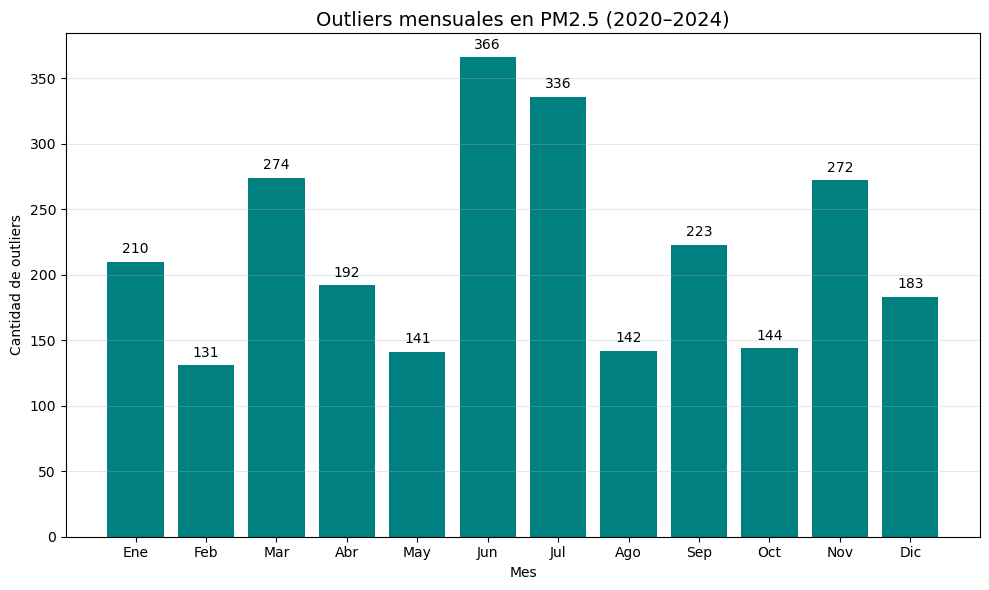

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Merge de hechos de PM2.5 con dimensión de fechas
df_pm25 = df_fact_pm25.merge(
    df_dim_date[['date_key', 'fecha']],
    on='date_key',
    how='left'
)

# 2. Asegurar datetime y extraer mes
df_pm25['fecha'] = pd.to_datetime(df_pm25['fecha'])
df_pm25['Mes']   = df_pm25['fecha'].dt.month

# 3. Diagnóstico: listar columnas para identificar nombre de la concentración
print("Columnas en df_pm25:", df_pm25.columns.tolist())

# 4. Ajusta 'concentration_col' al nombre real que imprima el paso anterior
concentration_col = 'Daily Mean PM2.5 Concentration'  # <- cámbialo si es otro
df_pm25.rename(columns={concentration_col: 'pm25_value'}, inplace=True)

# 5. Calcular outliers mensuales con método IQR
outliers_por_mes = {}
for mes in sorted(df_pm25['Mes'].unique()):
    df_mes = df_pm25[df_pm25['Mes'] == mes]
    q1 = df_mes['pm25_value'].quantile(0.25)
    q3 = df_mes['pm25_value'].quantile(0.75)
    iqr = q3 - q1
    limite_sup = q3 + 1.5 * iqr
    n_outliers = df_mes[df_mes['pm25_value'] > limite_sup].shape[0]
    outliers_por_mes[mes] = n_outliers

# 6. Preparar DataFrame para graficar
df_outliers = pd.DataFrame({
    'Mes': list(outliers_por_mes.keys()),
    'Outliers': list(outliers_por_mes.values())
})

# Mapeo de meses a abreviaturas en español
meses_es = ['Ene','Feb','Mar','Abr','May','Jun',
            'Jul','Ago','Sep','Oct','Nov','Dic']
df_outliers['Mes_nombre'] = df_outliers['Mes'].apply(lambda m: meses_es[m-1])

# 7. Graficar y añadir etiquetas de valor sobre cada barra
plt.figure(figsize=(10,6))
bars = plt.bar(
    df_outliers['Mes_nombre'],
    df_outliers['Outliers'],
    color='teal'
)

plt.bar_label(
    bars,
    labels=[str(v) for v in df_outliers['Outliers']],
    padding=4,
    fontsize=10,
    color='black'
)

plt.title('Outliers mensuales en PM2.5 (2020–2024)', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Cantidad de outliers')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# 8. Guardar la gráfica
plt.savefig('images/outliers_pm25_por_mes_etiquetas.png', dpi=300)
plt.show()


C:\Users\mjcd1\AppData\Local\Temp\ipykernel_16256\1402143863.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


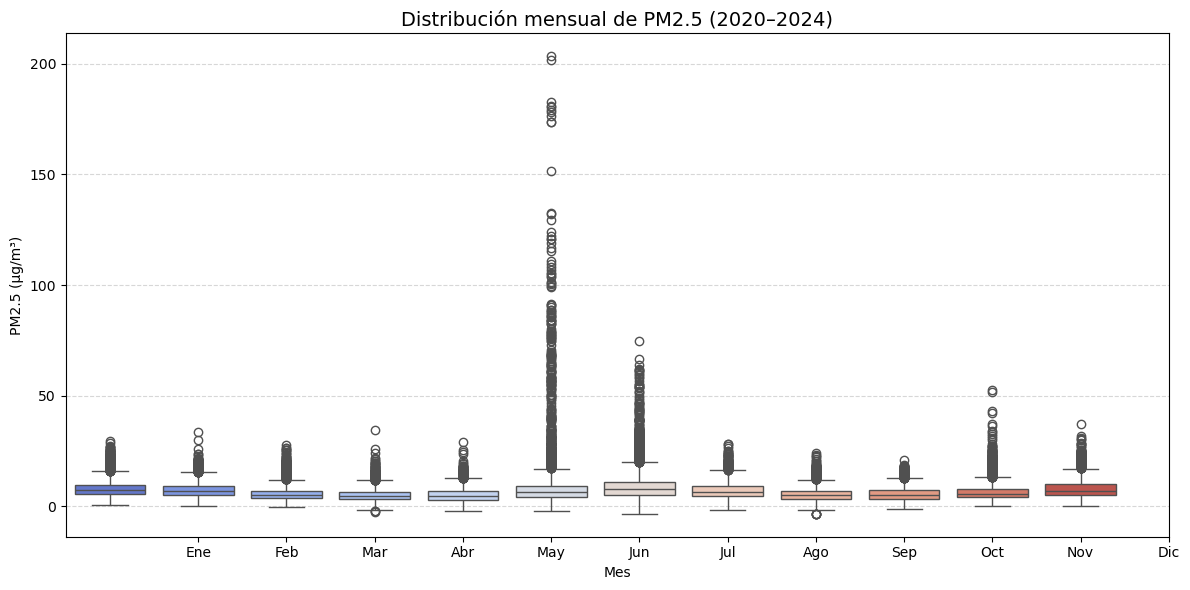

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convertir date_key a datetime y extraer mes
df_fact_pm25['date_key'] = pd.to_datetime(df_fact_pm25['date_key'])
df_fact_pm25['Month']    = df_fact_pm25['date_key'].dt.month

# 2. Nombres de mes en español
meses = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

# 3. Graficar distribución mensual
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_fact_pm25,
    x='Month',
    y='pm25_value',
    palette='coolwarm',
    showfliers=True
)

plt.title('Distribución mensual de PM2.5 (2020–2024)', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.xticks(
    ticks=range(1, 13),
    labels=meses
)

plt.tight_layout()
plt.savefig('images/boxplot_pm25_month.png', dpi=300)
plt.show()


## **📈 2️⃣ Doble línea: evolución temporal de PM2.5 y AQI**

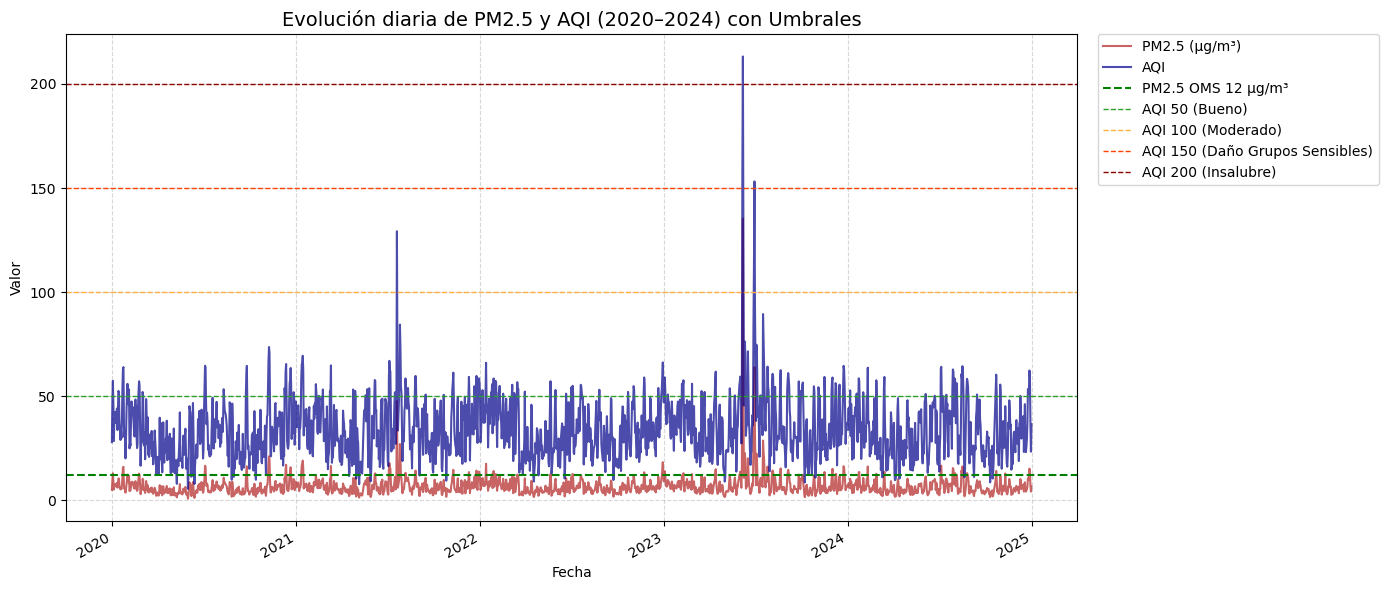

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preparar datos
df_fact_pm25['date_key'] = pd.to_datetime(df_fact_pm25['date_key'])
df_diario = (
    df_fact_pm25
    .groupby('date_key')[['pm25_value', 'aqi_value']]
    .mean()
    .reset_index()
)

# 2. Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 6))

# 3. Graficar series de PM2.5 y AQI
ax.plot(
    df_diario['date_key'],
    df_diario['pm25_value'],
    label='PM2.5 (µg/m³)',
    color='firebrick',
    alpha=0.7,
    linewidth=1.5
)
ax.plot(
    df_diario['date_key'],
    df_diario['aqi_value'],
    label='AQI',
    color='darkblue',
    alpha=0.7,
    linewidth=1.5
)

# 4. Añadir líneas de referencia
# Límite OMS para PM2.5 (24 h): 12 µg/m³
ax.axhline(
    12,
    color='green',
    linestyle='--',
    linewidth=1.5,
    label='PM2.5 OMS 12 µg/m³'
)

# Umbrales de AQI
aqi_umbrales = {
    'AQI 50 (Bueno)': 50,
    'AQI 100 (Moderado)': 100,
    'AQI 150 (Daño Grupos Sensibles)': 150,
    'AQI 200 (Insalubre)': 200
}
colores = ['#2ca02c', '#ffae42', '#ff4500', '#8b0000']

for (etiqueta, nivel), color in zip(aqi_umbrales.items(), colores):
    ax.axhline(
        nivel,
        color=color,
        linestyle='--',
        linewidth=1,
        label=etiqueta
    )

# 5. Estilo final
ax.set_title('Evolución diaria de PM2.5 y AQI (2020–2024) con Umbrales', fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
ax.grid(True, linestyle='--', alpha=0.5)

# Colocar leyenda fuera del área de la gráfica
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Formatear fecha en eje x
fig.autofmt_xdate()
plt.tight_layout()

# Guardar y mostrar
plt.savefig('images/line_pm25_aqi_con_umbrales.png', dpi=300)
plt.show()


## 📊 Relación entre PM2.5 y AQI (2020–2024)

Este gráfico revela cómo la concentración de PM2.5 se relaciona con el AQI, un índice que traduce los niveles contaminantes en riesgos de salud pública.

🧠 Observaciones clave:
- 2023 presenta los valores más altos en PM2.5 y AQI.
- Existe una correlación positiva clara.


### 📌 Conclusión del gráfico temporal de PM2.5 y AQI

Este gráfico muestra cómo la calidad del aire en Nueva York ha fluctuado diariamente entre 2020 y 2024, y cómo el **PM2.5 y el AQI se elevan en paralelo**, revelando una correlación estrecha entre la concentración de partículas y el riesgo para la salud pública.

### 🧠 Insights clave:
- Los **picos más agudos en 2023** reflejan eventos extremos, posiblemente relacionados con incendios forestales o fenómenos climáticos.
- El patrón estacional es evidente: se observan **repuntes en invierno**, lo que podría vincularse con calefacción urbana o inversión térmica.
- Las curvas mantienen una relación coherente, lo que confirma que el **AQI responde directamente al comportamiento del PM2.5**.

Este análisis temporal complementa la perspectiva del gráfico de dispersión y permite entender no solo el impacto puntual, sino la dinámica respiratoria de una ciudad entera.



## **🧪 Métodos de Medición del PM2.5**
A continuación se describen los cuatro métodos distintos utilizados para medir las partículas finas PM2.5 en el aire dentro del dataset:

1. **R & P Model 2025 PM-2.5 Sequential Air Sampler w/VSCC**
Tipo: Secuencial

Descripción: Instrumento automatizado que recolecta muestras en filtros para su análisis posterior. Incluye un componente llamado VSCC (Very Sharp Cut Cyclone) que elimina partículas mayores a 2.5 micras. Este método está aprobado por la EPA como método de referencia.

2. **Teledyne T640 at 5.0 LPM**
Tipo: Continuo

Descripción: Monitor de partículas en tiempo real que utiliza dispersión de luz para estimar las concentraciones. Opera a 5 litros por minuto (LPM). Aprobado por la EPA como método equivalente.

3. **Teledyne T640 at 5.0 LPM (Corrected)**
Tipo: Continuo corregido

Descripción: Es el mismo monitor que el anterior, pero con una corrección estadística aplicada. Esto mejora la precisión comparativa frente a métodos de referencia, especialmente cuando se detectan sesgos sistemáticos.

4. **PM2.5 SCC w/Correction Factor**
Tipo: Continuo corregido

Descripción: Utiliza un Sharp Cut Cyclone (SCC) para separar partículas y luego aplica un factor de corrección para ajustar los datos crudos del sensor. Se emplea en contextos donde la medición necesita mejorar su correspondencia con métodos estandarizados.